In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [117]:
all_data = pd.concat([train, test])

In [113]:
from datetime import datetime
import calendar

In [118]:
all_data

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950.0
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136.0
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156.0
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102.0
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,NaN
361,2021-12-28,NaN,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,NaN
362,2021-12-29,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,NaN
363,2021-12-30,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,NaN


In [119]:
datetime.strptime(all_data["date"][0], "%Y-%m-%d")

TypeError: strptime() argument 1 must be str, not Series

In [100]:
all_data["year"] = all_data["date"].map(lambda x: x.split("-")[0])
all_data["month"] = all_data["date"].map(lambda x: x.split("-")[1])
all_data["day"] = all_data["date"].map(lambda x: x.split("-")[2])

In [101]:
all_data = all_data.reset_index()

In [102]:
all_data.drop(["index"], axis=1, inplace=True)

In [103]:
all_data.loc[all_data[all_data["precipitation"].isnull()].index, "precipitation"] = 0

In [104]:
all_data["PM10"] = all_data["PM10"].fillna(all_data["PM10"].median())

In [105]:
all_data["PM2.5"] = all_data["PM2.5"].fillna(all_data["PM2.5"].median())

In [106]:
all_data["sunshine_sum"] = all_data["sunshine_sum"].fillna(all_data["sunshine_sum"].median())

In [107]:
all_data["THI"] = 9/5*all_data['temp_mean'] - 0.55*(1-all_data['humidity']/100)*(9/5*all_data['humidity']-26)+32

In [108]:
all_data.drop(["date"], axis=1, inplace=True)

In [110]:
all_data["precipitation"].map(lambda x : xd)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1455    0.0
1456    0.0
1457    0.2
1458    0.0
1459    0.0
Name: precipitation, Length: 1460, dtype: float64

In [109]:
all_data.isnull().sum()

precipitation      0
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       0
sunshine_rate      0
wind_mean          0
wind_max           0
rental           365
year               0
month              0
day                0
THI                0
dtype: int64

In [90]:
from pycaret.regression import *

<AxesSubplot:>

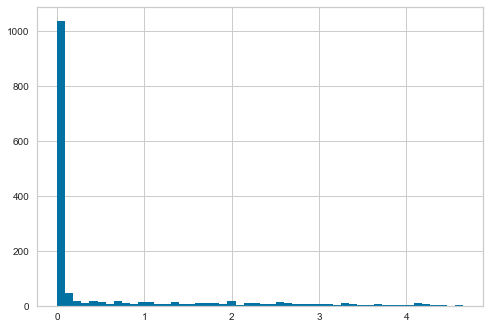

In [97]:
all_data["precipitation_log"].hist(bins=50)

In [ ]:
data = setup(data=train_tmp, target='PM10',train_size=0.8)